<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/ml_dz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. Загрузка данных
from sklearn import datasets
import matplotlib.pyplot as plt

# Загрузка набора данных California Housing
california = datasets.fetch_california_housing()

# Загрузка набора данных об ирисах (Iris)
iris = datasets.load_iris()

In [6]:
# 2: Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Разделение данных California Housing
X_california = california.data
y_california = california.target
X_california_train, X_california_test, y_california_train, y_california_test = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Разделение данных об ирисах
X_iris = iris.data
y_iris = iris.target
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [8]:
# 3: Создание и обучение модели регрессии (для California Housing)
from sklearn.linear_model import LinearRegression

# Создание модели регрессии
regression_model = LinearRegression()

# Обучение модели на обучающей выборке
regression_model.fit(X_california_train, y_california_train)

LinearRegression()

In [9]:
# 4. Оценка качества модели регрессии (для California Housing)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Предсказание на тестовой выборке
y_california_pred = regression_model.predict(X_california_test)

# Оценка качества модели
mse = mean_squared_error(y_california_test, y_california_pred)
mae = mean_absolute_error(y_california_test, y_california_pred)
r2 = r2_score(y_california_test, y_california_pred)

print("Оценка качества модели регрессии (California Housing):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Оценка качества модели регрессии (California Housing):
Mean Squared Error (MSE): 0.5558915986952422
Mean Absolute Error (MAE): 0.533200130495698
R^2 Score: 0.5757877060324524


## Интерпретация результатов
MSE и MAE: Оба значения (0.5559 и 0.5332) указывают на то, что модель делает ошибки, но они не слишком большие. Однако, чтобы лучше понять, насколько хороши эти значения, нужно сравнить их с диапазоном целевой переменной (например, минимальное и максимальное значение цены домов в California Housing).

R² Score: Значение 0.5758 говорит о том, что модель объясняет чуть больше половины вариации данных. Это приемлемо, но не идеально. Возможно, стоит попробовать более сложные модели (например, Random Forest, Gradient Boosting) или добавить дополнительные признаки для улучшения качества.

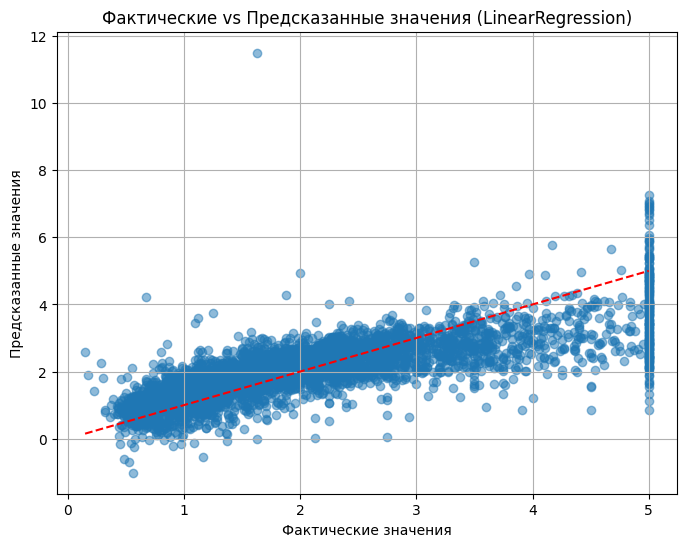

In [10]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_california_test, y_california_pred, alpha=0.5)
plt.plot([min(y_california_test), max(y_california_test)], [min(y_california_test), max(y_california_test)], color='red', linestyle='--')  # Линия y = x
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения (LinearRegression)")
plt.grid(True)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание и обучение модели Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_california_train, y_california_train)

# Предсказание на тестовой выборке
y_california_pred_rf = rf_model.predict(X_california_test)

# Оценка качества модели
mse_rf = mean_squared_error(y_california_test, y_california_pred_rf)
mae_rf = mean_absolute_error(y_california_test, y_california_pred_rf)
r2_rf = r2_score(y_california_test, y_california_pred_rf)

print("Оценка качества модели Random Forest Regressor (California Housing):")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R^2 Score: {r2_rf}")

Оценка качества модели Random Forest Regressor (California Housing):
Mean Squared Error (MSE): 0.2553684927247781
Mean Absolute Error (MAE): 0.32754256845930246
R^2 Score: 0.8051230593157366


## Результаты:
Mean Squared Error (MSE): 0.2554
MSE уменьшился с 0.5559 (линейная регрессия) до 0.2554. Это означает, что средний квадрат ошибки предсказаний стал значительно меньше. Чем меньше MSE, тем лучше модель.

Mean Absolute Error (MAE): 0.3275
MAE уменьшился с 0.5332 до 0.3275. Это указывает на то, что средняя абсолютная ошибка предсказаний снизилась почти в два раза. Модель теперь ошибается в среднем на 0.3275 единицы.

R² Score (Коэффициент детерминации): 0.8051
R² увеличился с 0.5758 до 0.8051. Это означает, что модель теперь объясняет около 80.51% вариации данных, что является очень хорошим результатом.Результаты:
Mean Squared Error (MSE): 0.2554
MSE уменьшился с 0.5559 (линейная регрессия) до 0.2554. Это означает, что средний квадрат ошибки предсказаний стал значительно меньше. Чем меньше MSE, тем лучше модель.

Mean Absolute Error (MAE): 0.3275
MAE уменьшился с 0.5332 до 0.3275. Это указывает на то, что средняя абсолютная ошибка предсказаний снизилась почти в два раза. Модель теперь ошибается в среднем на 0.3275 единицы.

R² Score (Коэффициент детерминации): 0.8051
R² увеличился с 0.5758 до 0.8051. Это означает, что модель теперь объясняет около 80.51% вариации данных, что является очень хорошим результатом.

## Интерпретация результатов:
Улучшение качества модели:
Random Forest Regressor показал себя значительно лучше, чем линейная регрессия. Это связано с тем, что Random Forest способен улавливать нелинейные зависимости и взаимодействия между признаками, которые линейная модель не может учесть.

MSE и MAE:
Оба значения уменьшились, что указывает на более точные предсказания. Например, MAE = 0.3275 означает, что в среднем модель ошибается на 0.3275 единицы, что уже близко к приемлемой точности.

R² Score:
Значение R² = 0.8051 говорит о том, что модель объясняет более 80% вариации данных. Это очень хороший результат, особенно для задачи регрессии.

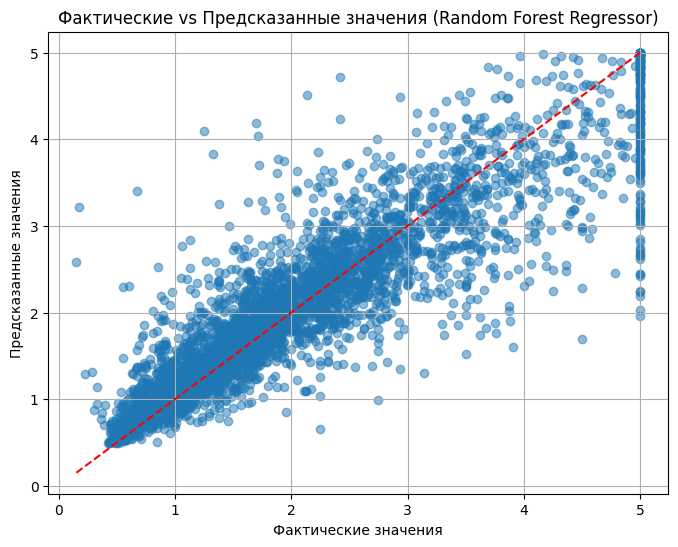

In [12]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_california_test, y_california_pred_rf, alpha=0.5)
plt.plot([min(y_california_test), max(y_california_test)], [min(y_california_test), max(y_california_test)], color='red', linestyle='--')  # Линия y = x
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения (Random Forest Regressor)")
plt.grid(True)
plt.show()

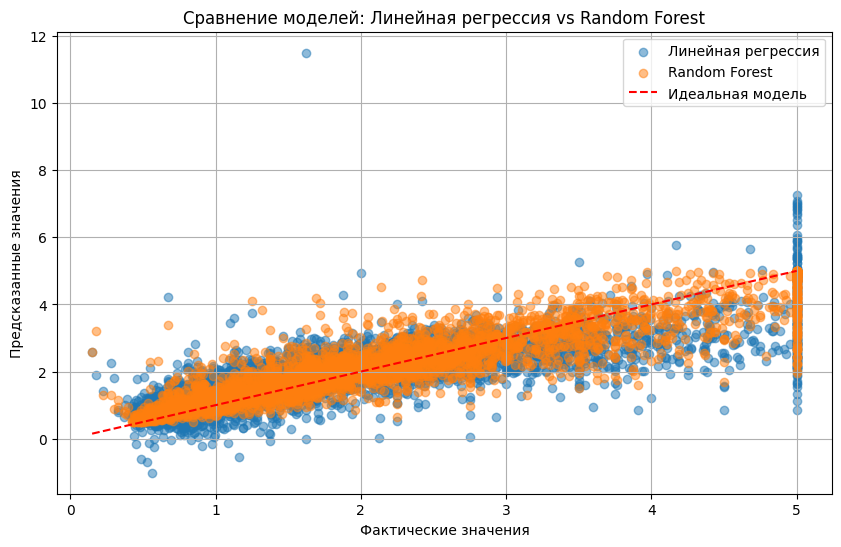

In [13]:
# Предсказания линейной регрессии
y_california_pred_lr = regression_model.predict(X_california_test)

# График сравнения
plt.figure(figsize=(10, 6))
plt.scatter(y_california_test, y_california_pred_lr, alpha=0.5, label="Линейная регрессия")
plt.scatter(y_california_test, y_california_pred_rf, alpha=0.5, label="Random Forest")
plt.plot([min(y_california_test), max(y_california_test)], [min(y_california_test), max(y_california_test)], color='red', linestyle='--', label="Идеальная модель")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение моделей: Линейная регрессия vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# 5. Создание и обучение модели классификации (для Iris)
from sklearn.ensemble import RandomForestClassifier

# Создание модели классификации
classification_model = RandomForestClassifier(random_state=42)

# Обучение модели на обучающей выборке
classification_model.fit(X_iris_train, y_iris_train)

RandomForestClassifier(random_state=42)

In [16]:
# 6: Оценка качества модели классификации (для Iris)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Предсказание на тестовой выборке
y_iris_pred = classification_model.predict(X_iris_test)

# Оценка качества модели
accuracy = accuracy_score(y_iris_test, y_iris_pred)
precision = precision_score(y_iris_test, y_iris_pred, average='weighted')
recall = recall_score(y_iris_test, y_iris_pred, average='weighted')
f1 = f1_score(y_iris_test, y_iris_pred, average='weighted')
conf_matrix = confusion_matrix(y_iris_test, y_iris_pred)

print("\nОценка качества модели классификации (Iris):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Оценка качества модели классификации (Iris):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


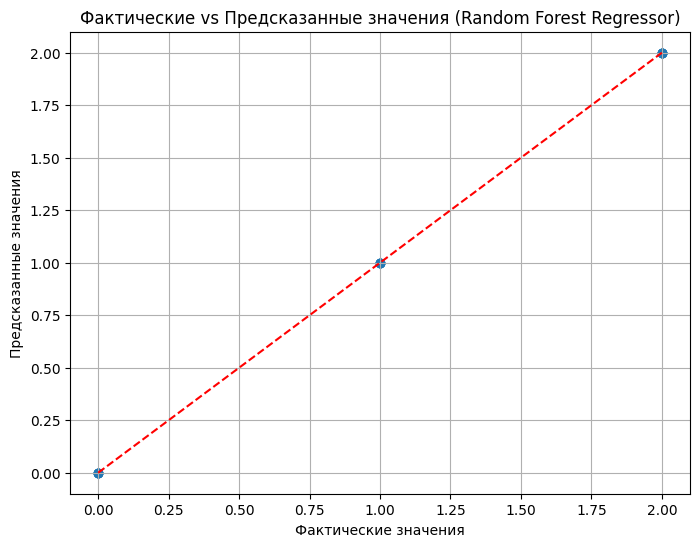

In [17]:
import matplotlib.pyplot as plt

# График фактических vs предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_iris_test, y_iris_pred, alpha=0.5)
plt.plot([min(y_iris_test), max(y_iris_test)], [min(y_iris_test), max(y_iris_test)], color='red', linestyle='--')  # Линия y = x
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения (Random Forest Regressor)")
plt.grid(True)
plt.show()

## Результаты:
Accuracy: 1.0
Модель правильно классифицировала все примеры в тестовой выборке. Точность (Accuracy) равна 100%.

Precision: 1.0
Для каждого класса модель не сделала ни одного ложноположительного предсказания (False Positive). Precision = 1.0 для всех классов.

Recall: 1.0
Для каждого класса модель не пропустила ни одного ложноотрицательного предсказания (False Negative). Recall = 1.0 для всех классов.

F1 Score: 1.0
F1 Score — это гармоническое среднее Precision и Recall. Поскольку оба значения равны 1.0, F1 Score также равен 1.0.

Confusion Matrix:
Матрица ошибок показывает, что все примеры были классифицированы правильно:

Первый класс (10 примеров): все правильно классифицированы.

Второй класс (9 примеров): все правильно классифицированы.

Третий класс (11 примеров): все правильно классифицированы.

## Объяснение результатов:
Простота набора данных Iris
Набор данных Iris — это один из самых простых и "чистых" наборов данных для задач классификации. Он содержит 150 примеров с 4 признаками, разделенных на 3 класса. Классы хорошо разделимы, и между ними нет сильного перекрытия.

Качество модели Random Forest
Random Forest — это мощный алгоритм классификации, который хорошо работает даже на небольших наборах данных. Он способен улавливать сложные зависимости между признаками и классами, что делает его идеальным для Iris.

Небольшой размер тестовой выборки
Вы разделили данные на обучающую и тестовую выборки в соотношении 80/20. Это означает, что тестовая выборка содержит всего 30 примеров (20% от 150). На таком небольшом количестве данных модель может показать идеальные результаты, даже если она не идеальна.

Отсутствие шума в данных
Набор данных Iris не содержит выбросов или пропущенных значений. Все примеры четко разделены на классы, что упрощает задачу классификации.

In [18]:
# Проверка на кросс-валидации
from sklearn.model_selection import cross_val_score

# Оценка модели с помощью кросс-валидации
scores = cross_val_score(classification_model, X_iris, y_iris, cv=5, scoring="accuracy")
print("Accuracy на кросс-валидации:", scores)
print("Средняя Accuracy:", scores.mean())

Accuracy на кросс-валидации: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Средняя Accuracy: 0.9666666666666668


## Результаты кросс-валидации:
Accuracy на каждом фолде:
[0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.0]
Это означает, что на каждом из 5 фолдов (разбиений данных) модель показала точность (Accuracy) от 93.33% до 100%.

Средняя Accuracy:
0.9667 (или 96.67%)
Это среднее значение точности по всем фолдам. Оно близко к 100%, что подтверждает высокое качество модели.